In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

#dict(list(boston.items())[0:1])



In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = boston.data
X.shape

(506, 13)

In [5]:
y = boston.target
y.shape

(506,)

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
type(X)

numpy.ndarray

Scikit Learn accepts Numpy arrays as well as Pandas data frames

We split the data into train and test data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=9)

We instantiate the linear regression

In [11]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [12]:
X_train.shape, y_train.shape

((354, 13), (354,))

In [13]:
X_test.shape, y_test.shape

((152, 13), (152,))

We fit the training data to a linear model

In [14]:
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We use the model to predict the test data

In [15]:
y_predicted = LinReg.predict(X_test)

We measure the accuracy of the model by using the mean square error (MSE)

Let us use Numpy first

In [16]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

19.295749073363368


Let us use sklearn metrics next

In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

19.295749073363368


What is the error on the training data

In [18]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

23.168558504671363


In [19]:
### How much does the model (the x variable) explain  the variability of the response data around its mean?

In [20]:
LinReg.score(X_test, y_test)

0.7826126074271013

Let us check the histogram of the residuals. Does it satisfy the assumptions for inference?

(array([ 3.,  9., 30., 63., 21., 13.,  7.,  2.,  2.,  2.]),
 array([-10.49760771,  -7.67103817,  -4.84446863,  -2.0178991 ,
          0.80867044,   3.63523998,   6.46180952,   9.28837905,
         12.11494859,  14.94151813,  17.76808767]),
 <a list of 10 Patch objects>)

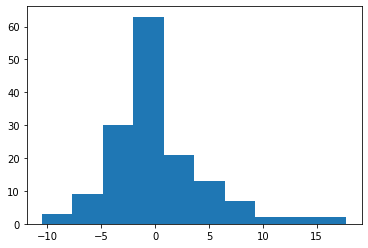

In [21]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

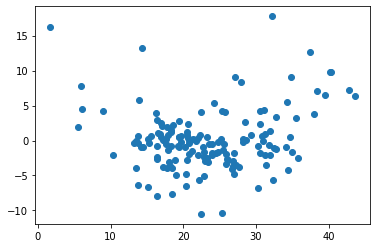

In [22]:
plt.scatter(y_predicted, y_test - y_predicted)

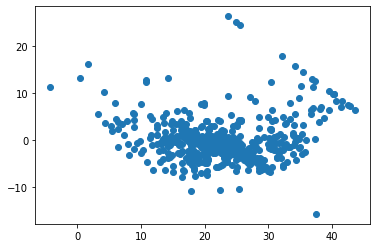

In [23]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

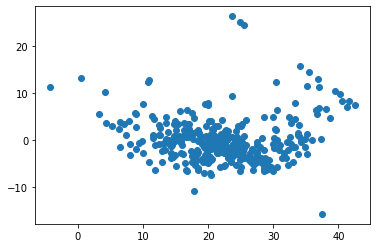

In [24]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [25]:
print(LinReg.coef_)


[-1.10653650e-01  4.35058932e-02  5.27220034e-02  2.23444360e+00
 -1.58398648e+01  3.89237897e+00  1.01476364e-03 -1.32124422e+00
  2.84930457e-01 -1.15585903e-02 -9.02839713e-01  8.45742872e-03
 -5.27607786e-01]


In [26]:
print(LinReg.intercept_)

33.23779607719034
